# Importing libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

# Importing data

In [53]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach1\ClimateWins'

In [54]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\ML_Ach1\\ClimateWins'

In [55]:
Weather = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Weather_unsc_clean.csv'))
Pleasant_weather = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pleasant_weather.pkl'))

In [56]:
Weather.head()

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   
1           1                  6            0.84           1.018   
2           2                  8            0.90           1.018   
3           3                  3            0.92           1.018   
4           4                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  VALENTIA_pressure  \
0              6.5             0.8            10.9  ...             1.0003   
1              6.1             3.3            10.1  ...             1.0007   
2              8.5             5.1             9.9  ...             1.0096   
3              6.3             3.8            10.6  ...             1.0184   
4              3.0            -0.7             6.0  ...             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  \
0                 8.5                6.0               10.9   
1                 8.9                5.6               12.1   
2                10.5                8.1               12.9   
3                 7.4                7.3               10.6   
4                 5.7                3.0                8.4   

   KASSEL_cloud_cover  MUNCHENB_pressure  STOCKHOLM_humidity  
0                   8             1.0304                0.98  
1                   6             1.0292                0.62  
2                   8             1.0320                0.69  
3                   6             1.0443                0.98  
4                   7             1.0430                0.96  

[5 rows x 136 columns]

In [57]:
# Dropping 'Unnamed: 0' column
Weather = Weather.drop(['Unnamed: 0'], axis=1)

In [58]:
Weather.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_pressure  \
0            10.9                     1  ...             1.0003   
1            10.1                     6  ...             1.0007   
2             9.9                     6  ...             1.0096   
3            10.6                     8  ...             1.0184   
4             6.0                     8  ...             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  \
0                 8.5                6.0               10.9   
1                 8.9                5.6               12.1   
2                10.5                8.1               12.9   
3                 7.4                7.3               10.6   
4                 5.7                3.0                8.4   

   KASSEL_cloud_cover  MUNCHENB_pressure  STOCKHOLM_humidity  
0                   8             1.0304                0.98  
1                   6             1.0292                0.62  
2                   8             1.0320                0.69  
3                   6             1.0443                0.98  
4                   7             1.0430                0.96  

[5 rows x 135 columns]

In [59]:
Weather.shape

(22950, 135)

# Random Forest
# -> Finding the most useful characteristics of the data set

# Subsetting to a decade 1990 - 1999

In [60]:
Weather.index

RangeIndex(start=0, stop=22950, step=1)

In [61]:
# Importing
Weather2 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Weather_NOTclean.csv'))

In [62]:
# Dropping 'Unnamed: 0' column
Weather2 = Weather2.drop(['Unnamed: 0'], axis=1)

In [63]:
Weather2.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  1960-01-01      1                  7               2.1            0.85   
1  1960-01-02      1                  6               2.1            0.84   
2  1960-01-03      1                  8               2.1            0.90   
3  1960-01-04      1                  3               2.1            0.92   
4  1960-01-05      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_humidity  \
0                 0             0.7  ...               0.88   
1                 0             1.1  ...               0.91   
2                 0             0.0  ...               0.91   
3                 0             4.1  ...               0.86   
4                 0             5.4  ...               0.80   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0             1.0003                       0.45                    0.34   
1             1.0007                       0.25                    0.84   
2             1.0096                       0.17                    0.08   
3             1.0184                       0.13                    0.98   
4             1.0328                       0.46                    0.00   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0                4.7                 8.5   
1                    0                0.7                 8.9   
2                    0                0.1                10.5   
3                    0                0.0                 7.4   
4                    0                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max  YEAR  
0                6.0               10.9  1960  
1                5.6               12.1  1960  
2                8.1               12.9  1960  
3                7.3               10.6  1960  
4                3.0                8.4  1960  

[5 rows x 150 columns]

In [64]:
# Subsetting and filtering for decade
Weather2['DATE'] = pd.to_datetime(Weather2['DATE'])
Weather_sub1 = Weather2[(Weather2['DATE'].dt.year >= 1990) & (Weather2['DATE'].dt.year <= 1999)]

In [65]:
Weather2.shape

(22950, 150)

In [66]:
Weather_sub1.shape

(3652, 150)

In [67]:
# Observation type counts
obs_type_counts1 = (Weather_sub1.columns.str.split('_', n=1).str[1].value_counts().sort_values())

In [68]:
obs_type_counts1

snow_depth           6
wind_speed           9
cloud_cover         14
humidity            14
pressure            14
global_radiation    15
precipitation       15
sunshine            15
temp_mean           15
temp_min            15
temp_max            15
Name: count, dtype: int64

In [70]:
# Dropping 'DATE', 'MONTH' & 'YEAR' columns
Weather_sub1 = Weather_sub1.drop(columns=['DATE', 'MONTH', 'YEAR'], errors='ignore')

In [71]:
# Filling in the missing values
Weather_sub1['KASSEL_cloud_cover'] = Weather_sub1['LJUBLJANA_cloud_cover']
Weather_sub1['MUNCHENB_pressure'] = Weather_sub1['SONNBLICK_pressure']
Weather_sub1['STOCKHOLM_humidity'] = Weather_sub1['OSLO_humidity']

In [72]:
# Observation type counts
Weather_sub1.columns.str.split('_', n=1).str[1].value_counts()

cloud_cover         15
humidity            15
pressure            15
global_radiation    15
precipitation       15
sunshine            15
temp_mean           15
temp_min            15
temp_max            15
wind_speed           9
snow_depth           6
Name: count, dtype: int64

In [73]:
# Dropping the 2 widely missing observation types
Weather_sub1 = Weather_sub1.drop(columns=Weather_sub1.filter(regex=r'_(wind_speed|snow_depth)$').columns)

In [74]:
Weather_sub1

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  VALENTIA_pressure  VALENTIA_global_radiation  \
10958  ...             1.0068                       0.20   
10959  ...             1.0040                       0.21   
10960  ...             1.0094                       0.38   
10961  ...             1.0112                       0.13   
10962  ...             1.0108                       0.20   
...    ...                ...                        ...   
14605  ...             0.9954                       0.15   
14606  ...             1.0102                       0.41   
14607  ...             1.0229                       0.35   
14608  ...             1.0171                       0.14   
14609  ...             1.0172                       0.12   

       VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
10958                    0.51                2.0                 6.9   
10959                    1.48                0.1                 7.3   
10960                    0.00                4.9                 7.8   
10961                    0.92                0.0                 6.5   
10962                    0.56                1.2                 9.4   
...                       ...                ...                 ...   
14605                    0.41                0.1                 4.8   
14606                    0.03                5.1                 5.3   
14607                    0.85                3.9                 7.1   
14608                    0.27              

In [75]:
# Observation type counts
Weather_sub1.columns.str.split('_', n=1).str[1].value_counts()

cloud_cover         15
humidity            15
pressure            15
global_radiation    15
precipitation       15
sunshine            15
temp_mean           15
temp_min            15
temp_max            15
Name: count, dtype: int64

In [76]:
Weather_sub1.shape

(3652, 135)

In [77]:
# Creating a NumPy array for X
X = Weather_sub1.to_numpy()
X.shape

(3652, 135)

In [78]:
# Creating a NumPy array for y
y = Pleasant_weather.to_numpy()
y.shape

(22950, 15)

In [80]:
len(Weather_sub1), len(Pleasant_weather)

(3652, 22950)

In [81]:
# Adding 'DATE' to labels
Pleasant_weather['DATE'] = Weather2['DATE'].values

In [82]:
Pleasant_weather.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather', 'DATE'],
      dtype='object')

In [83]:
# Subsetting labels
Labels1 = Pleasant_weather[(Pleasant_weather['DATE'].dt.year >= 1990) & (Pleasant_weather['DATE'].dt.year <= 1999)]

In [84]:
Labels1.shape

(3652, 16)

In [85]:
# Dropping 'DATE'
Labels1 = Labels1.drop(columns=['DATE'], errors='ignore')

In [86]:
Labels1.shape

(3652, 15)

In [87]:
# Creating a NumPy array for y
y = Labels1.to_numpy()
y.shape

(3652, 15)

In [88]:
# Using argmax to get rid of one-hot encoding
y = np.argmax(y, axis = 1)
print(y.shape)
y

(3652,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# Splitting the data, while preserving the temporal aspect/dependancy by 'not shuffling'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [90]:
# Creating a RF classifier & training the model on the training dataset
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

# Model Accuracy

In [91]:
y_pred = clf.predict(X_test) 
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7879616963064295


In [92]:
class_names = clf.classes_.astype(str)

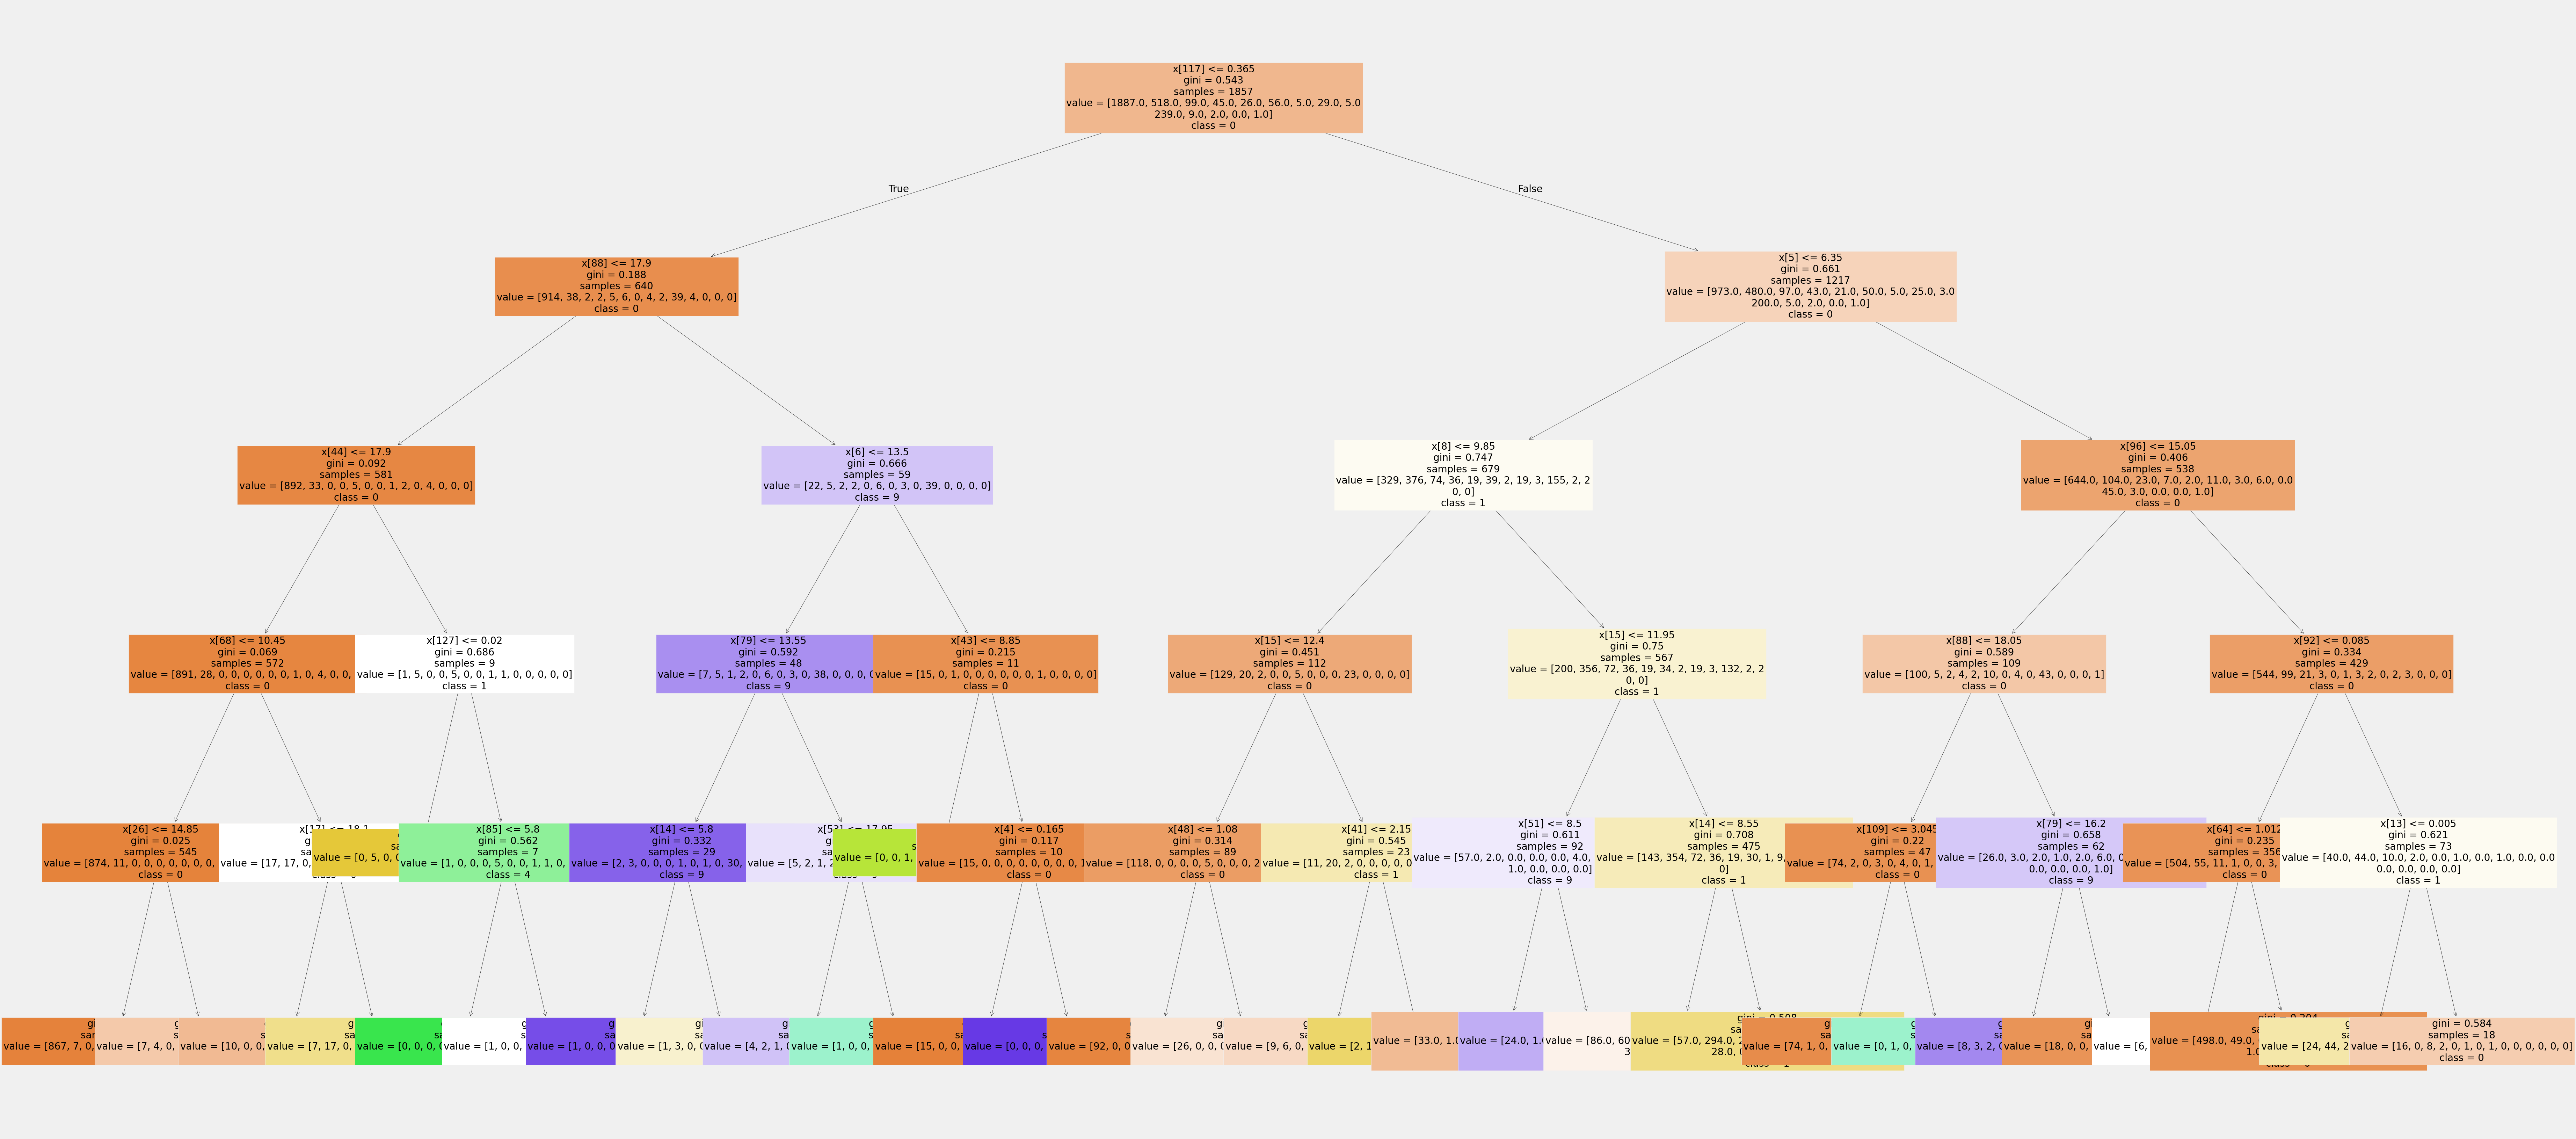

In [93]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[23], fontsize = 20, class_names=class_names, filled=True);

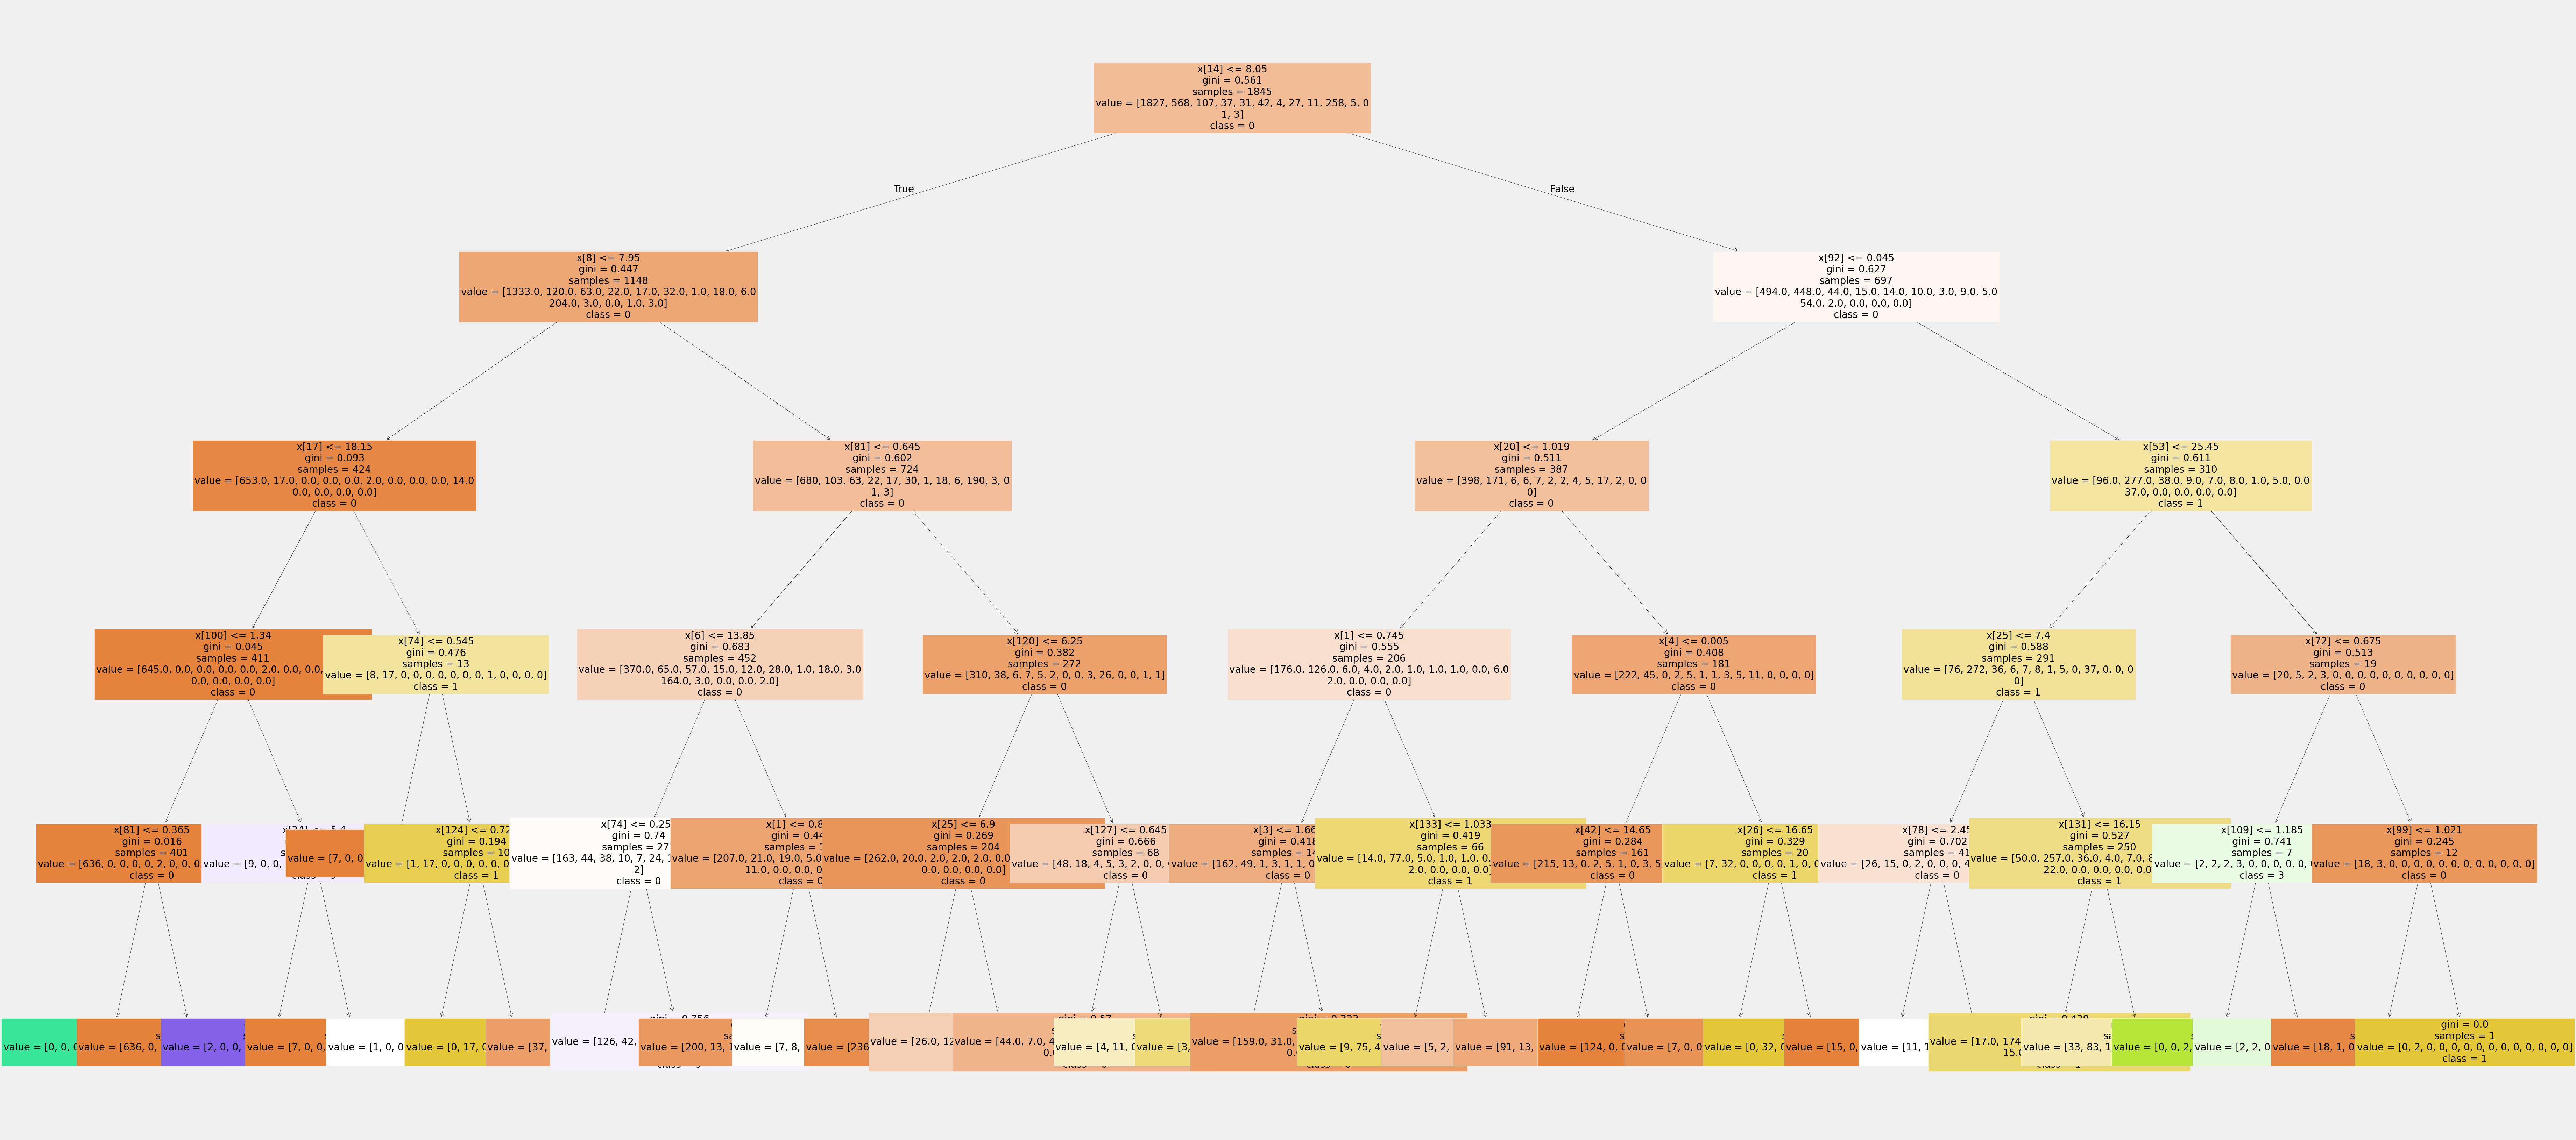

In [94]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[25], fontsize = 20, class_names=class_names, filled=True);

# Feature importance by station

In [95]:
newarray = clf.feature_importances_
newarray

array([1.04077858e-02, 2.29435265e-02, 3.07918543e-03, 1.60872041e-02,
       1.17866957e-01, 2.94076654e-02, 1.52560668e-02, 1.07677794e-02,
       3.26630586e-02, 1.07930116e-02, 8.51384471e-03, 1.50478613e-03,
       1.29569167e-02, 3.49122727e-02, 1.17293566e-02, 2.48770642e-02,
       9.72054795e-03, 4.99553402e-02, 9.21672582e-04, 1.13480405e-03,
       1.94841093e-03, 5.52985799e-03, 4.60065700e-03, 3.23664720e-03,
       1.90695377e-02, 1.37504012e-02, 2.20884446e-02, 1.67138346e-04,
       1.89440758e-04, 3.44081914e-03, 2.01642238e-03, 4.80587177e-03,
       7.92028716e-04, 2.82342610e-03, 3.34079729e-04, 9.82285349e-03,
       4.88022071e-04, 3.93163476e-04, 1.21616754e-02, 1.70307729e-03,
       2.50111407e-03, 1.83794390e-03, 4.40329278e-03, 8.57078780e-04,
       6.62668736e-03, 1.58161327e-04, 5.31570794e-04, 2.40064516e-03,
       7.32597375e-03, 2.12618973e-04, 3.66431871e-04, 6.21117008e-03,
       6.72717860e-04, 1.26454388e-02, 4.47148286e-04, 2.67981413e-03,
      

In [97]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.04077858e-02, 2.29435265e-02, 3.07918543e-03, 1.60872041e-02,
         1.17866957e-01, 2.94076654e-02, 1.52560668e-02, 1.07677794e-02,
         3.26630586e-02],
        [1.07930116e-02, 8.51384471e-03, 1.50478613e-03, 1.29569167e-02,
         3.49122727e-02, 1.17293566e-02, 2.48770642e-02, 9.72054795e-03,
         4.99553402e-02],
        [9.21672582e-04, 1.13480405e-03, 1.94841093e-03, 5.52985799e-03,
         4.60065700e-03, 3.23664720e-03, 1.90695377e-02, 1.37504012e-02,
         2.20884446e-02],
        [1.67138346e-04, 1.89440758e-04, 3.44081914e-03, 2.01642238e-03,
         4.80587177e-03, 7.92028716e-04, 2.82342610e-03, 3.34079729e-04,
         9.82285349e-03],
        [4.88022071e-04, 3.93163476e-04, 1.21616754e-02, 1.70307729e-03,
         2.50111407e-03, 1.83794390e-03, 4.40329278e-03, 8.57078780e-04,
         6.62668736e-03],
        [1.58161327e-04, 5.31570794e-04, 2.40064516e-03, 7.32597375e-03,
         2.12618973e-04, 3.66431871e-04, 6.21117008e-03, 6.72717860

In [98]:
sumarray = np.sum(newarray[0], axis=1)
print(sumarray.shape)
sumarray

(15,)


array([0.25847923, 0.16496314, 0.07228043, 0.02439208, 0.03097206,
       0.03052473, 0.03012053, 0.09888887, 0.03435514, 0.11536886,
       0.03739392, 0.02044114, 0.03016815, 0.02651951, 0.0251322 ])

In [99]:
# Creating station name index
stations = (Weather_sub1.columns.str.split('_', n=1).str[0].unique().tolist())
print(len(stations))
print(stations)

15
['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [100]:
important = pd.Series(sumarray, index=stations).sort_values(ascending=False)
important

BASEL         0.258479
BELGRADE      0.164963
MADRID        0.115369
LJUBLJANA     0.098889
BUDAPEST      0.072280
MUNCHENB      0.037394
MAASTRICHT    0.034355
DUSSELDORF    0.030972
HEATHROW      0.030525
SONNBLICK     0.030168
KASSEL        0.030121
STOCKHOLM     0.026520
VALENTIA      0.025132
DEBILT        0.024392
OSLO          0.020441
dtype: float64

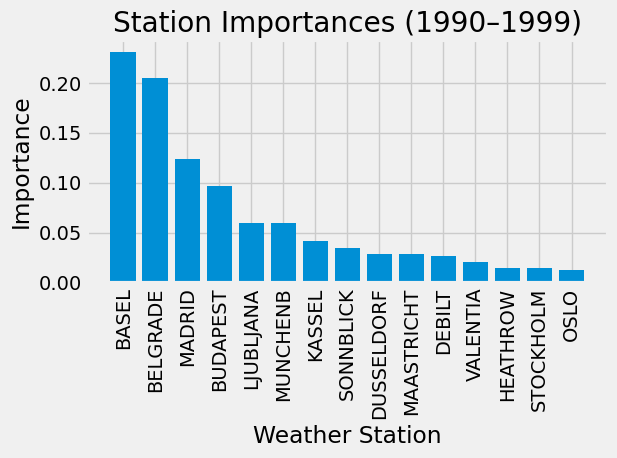

In [141]:
# Plotting weather stations importance
plt.style.use('fivethirtyeight')
x_values = range(len(important))
plt.bar(x_values, important.values)
plt.xticks(x_values, important.index, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Weather Station')
plt.title('Station Importances (1990–1999)')
plt.tight_layout()
plt.show()

# -> Basel, Belgrade and Madrid weather stations seem to have the most influence on how random forest divides up data

# Subsetting to a decade 2000 - 2009

In [142]:
Weather.index

RangeIndex(start=0, stop=22950, step=1)

In [143]:
# Importing
Weather2 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Weather_NOTclean.csv'))

In [144]:
# Dropping 'Unnamed: 0' column
Weather2 = Weather2.drop(['Unnamed: 0'], axis=1)

In [145]:
Weather2.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  1960-01-01      1                  7               2.1            0.85   
1  1960-01-02      1                  6               2.1            0.84   
2  1960-01-03      1                  8               2.1            0.90   
3  1960-01-04      1                  3               2.1            0.92   
4  1960-01-05      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_humidity  \
0                 0             0.7  ...               0.88   
1                 0             1.1  ...               0.91   
2                 0             0.0  ...               0.91   
3                 0             4.1  ...               0.86   
4                 0             5.4  ...               0.80   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0             1.0003                       0.45                    0.34   
1             1.0007                       0.25                    0.84   
2             1.0096                       0.17                    0.08   
3             1.0184                       0.13                    0.98   
4             1.0328                       0.46                    0.00   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0                4.7                 8.5   
1                    0                0.7                 8.9   
2                    0                0.1                10.5   
3                    0                0.0                 7.4   
4                    0                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max  YEAR  
0                6.0               10.9  1960  
1                5.6               12.1  1960  
2                8.1               12.9  1960  
3                7.3               10.6  1960  
4                3.0                8.4  1960  

[5 rows x 150 columns]

In [146]:
Weather2.shape

(22950, 150)

In [147]:
# Subsetting and filtering for decade
Weather2['DATE'] = pd.to_datetime(Weather2['DATE'])
Weather_sub2 = Weather2[(Weather2['DATE'].dt.year >= 2000) & (Weather2['DATE'].dt.year <= 2009)]

In [148]:
Weather_sub2.shape

(3653, 150)

In [149]:
# Observation type counts
obs_type_counts2 = (Weather_sub2.columns.str.split('_', n=1).str[1].value_counts().sort_values())

In [150]:
obs_type_counts2

snow_depth           6
wind_speed           9
cloud_cover         14
humidity            14
pressure            14
global_radiation    15
precipitation       15
sunshine            15
temp_mean           15
temp_min            15
temp_max            15
Name: count, dtype: int64

In [151]:
# Dropping 'DATE', 'MONTH' & 'YEAR' columns
Weather_sub2 = Weather_sub2.drop(columns=['DATE', 'MONTH', 'YEAR'], errors='ignore')

In [152]:
# Filling in the missing values
Weather_sub2['KASSEL_cloud_cover'] = Weather_sub2['LJUBLJANA_cloud_cover']
Weather_sub2['MUNCHENB_pressure'] = Weather_sub2['SONNBLICK_pressure']
Weather_sub2['STOCKHOLM_humidity'] = Weather_sub2['OSLO_humidity']

In [153]:
# Observation type counts
Weather_sub2.columns.str.split('_', n=1).str[1].value_counts()

cloud_cover         15
humidity            15
pressure            15
global_radiation    15
precipitation       15
sunshine            15
temp_mean           15
temp_min            15
temp_max            15
wind_speed           9
snow_depth           6
Name: count, dtype: int64

In [154]:
# Dropping the 2 widely missing observation types
Weather_sub2 = Weather_sub2.drop(columns=Weather_sub2.filter(regex=r'_(wind_speed|snow_depth)$').columns)

In [155]:
Weather_sub2

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610                  8            0.89          1.0286   
14611                  8            0.87          1.0318   
14612                  5            0.81          1.0314   
14613                  7            0.79          1.0262   
14614                  5            0.90          1.0246   
...                  ...             ...             ...   
18258                  7            0.80          1.0118   
18259                  7            0.82          1.0084   
18260                  7            0.92          1.0028   
18261                  8            0.92          0.9979   
18262                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   
14611              3.6             2.7             4.8                     8   
14612              2.2             0.1             4.8                     5   
14613              3.9             0.5             7.5                     7   
14614              6.0             3.8             8.6                     7   
...                ...             ...             ...                   ...   
18258              1.0            -3.9             5.5                     8   
18259              3.2             1.0             4.8                     4   
18260              4.5             2.4            10.0                     6   
18261              8.5             7.5            11.5                     6   
18262              6.6             4.3             7.9                     6   

       ...  VALENTIA_pressure  VALENTIA_global_radiation  \
14610  ...             1.0235                       0.22   
14611  ...             1.0177                       0.13   
14612  ...             1.0154                       0.22   
14613  ...             1.0099                       0.36   
14614  ...             0.9957                       0.12   
...    ...                ...                        ...   
18258  ...             1.0039                       0.37   
18259  ...             0.9975                       0.22   
18260  ...             0.9866                       0.12   
18261  ...             0.9862                       0.12   
18262  ...             1.0029                       0.21   

       VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
14610                    0.10                0.7                 6.6   
14611                    0.42                0.0                 9.6   
14612                    1.05                1.2                 8.6   
14613                    0.34                3.5                 8.1   
14614                    0.33                0.0                 7.7   
...                       ...                ...                 ...   
18258                    0.01                4.7                 7.2   
18259                    1.25                0.0                 4.8   
18260                    2.84                0.0                 3.4   
18261                    1.46              

In [156]:
# Observation type counts
Weather_sub2.columns.str.split('_', n=1).str[1].value_counts()

cloud_cover         15
humidity            15
pressure            15
global_radiation    15
precipitation       15
sunshine            15
temp_mean           15
temp_min            15
temp_max            15
Name: count, dtype: int64

In [157]:
Weather_sub2.shape

(3653, 135)

In [158]:
# Creating a NumPy array for X
X = Weather_sub2.to_numpy()
X.shape

(3653, 135)

In [159]:
# Creating a NumPy array for y
y = Pleasant_weather.to_numpy()
y.shape

(22950, 16)

In [160]:
len(Weather_sub2), len(Pleasant_weather)

(3653, 22950)

# -> Subsetting the labels data set

In [161]:
# Adding 'DATE' to labels
Pleasant_weather['DATE'] = Weather2['DATE'].values

In [162]:
Pleasant_weather.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather', 'DATE'],
      dtype='object')

In [163]:
# Subsetting labels
Labels2 = Pleasant_weather[(Pleasant_weather['DATE'].dt.year >= 2000) & (Pleasant_weather['DATE'].dt.year <= 2009)]

In [164]:
Labels2.shape

(3653, 16)

In [165]:
# Dropping 'DATE'
Labels2 = Labels2.drop(columns=['DATE'], errors='ignore')

In [166]:
Labels2.shape

(3653, 15)

In [167]:
# Creating a NumPy array for y
y = Labels2.to_numpy()
y.shape

(3653, 15)

In [168]:
# Using argmax to get rid of one-hot encoding
y = np.argmax(y, axis = 1)
print(y.shape)
y

(3653,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
# Splitting the data, while preserving the temporal aspect/dependancy by 'not shuffling'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [170]:
# Creating a RF classifier & training the model on the training dataset
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

# Model Accuracy

In [171]:
y_pred = clf.predict(X_test) 
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8030095759233926


In [172]:
class_names = clf.classes_.astype(str)

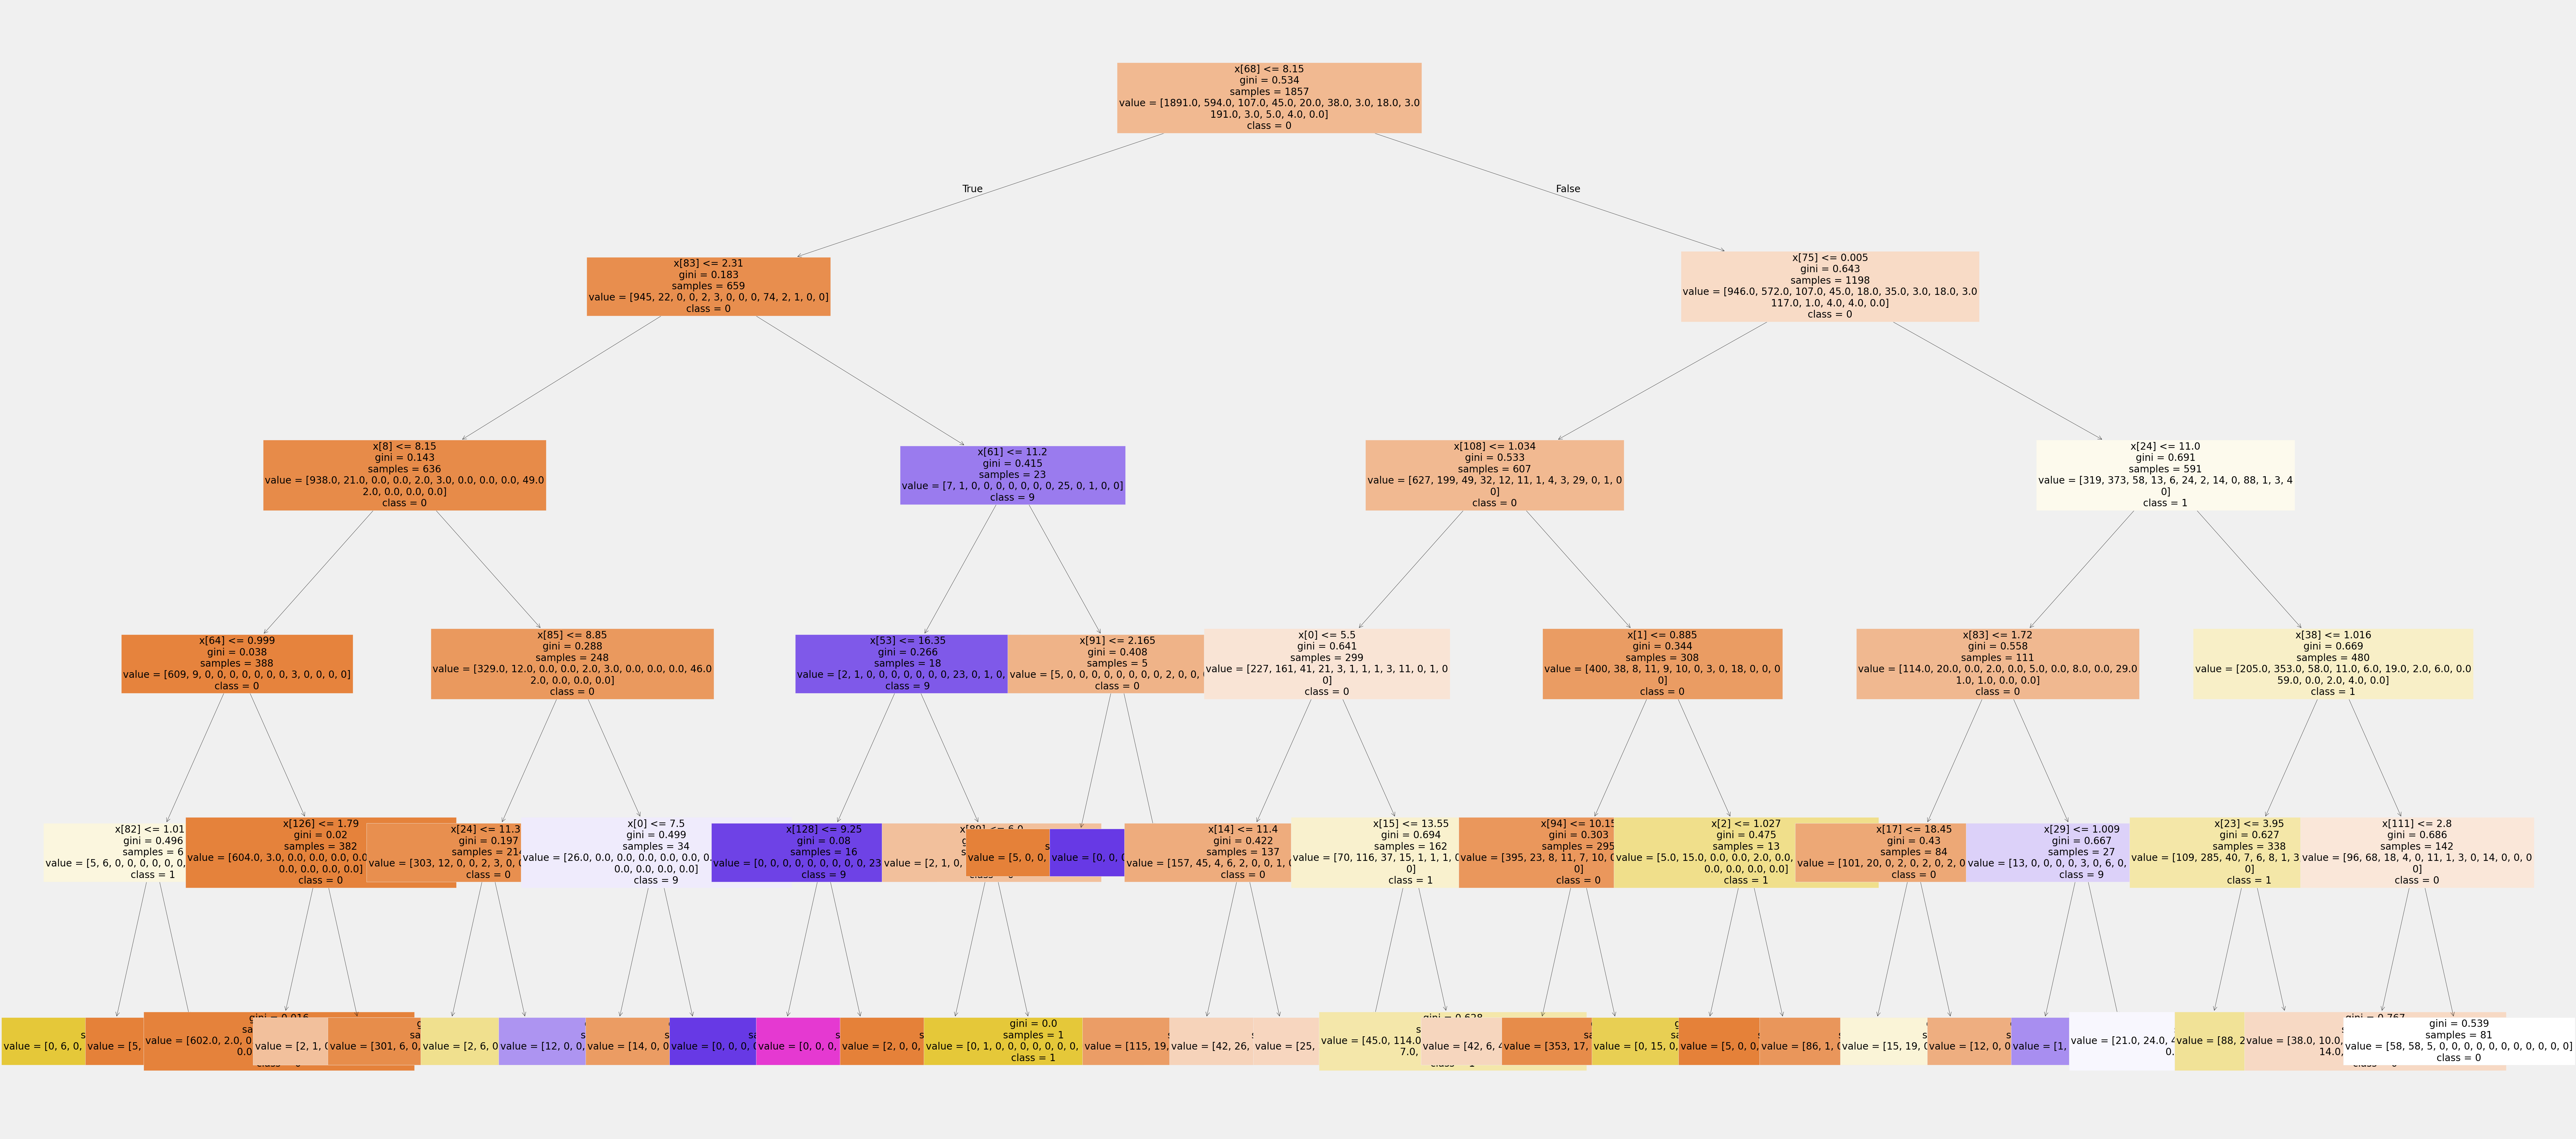

In [173]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[23], fontsize = 20, class_names=class_names, filled=True);

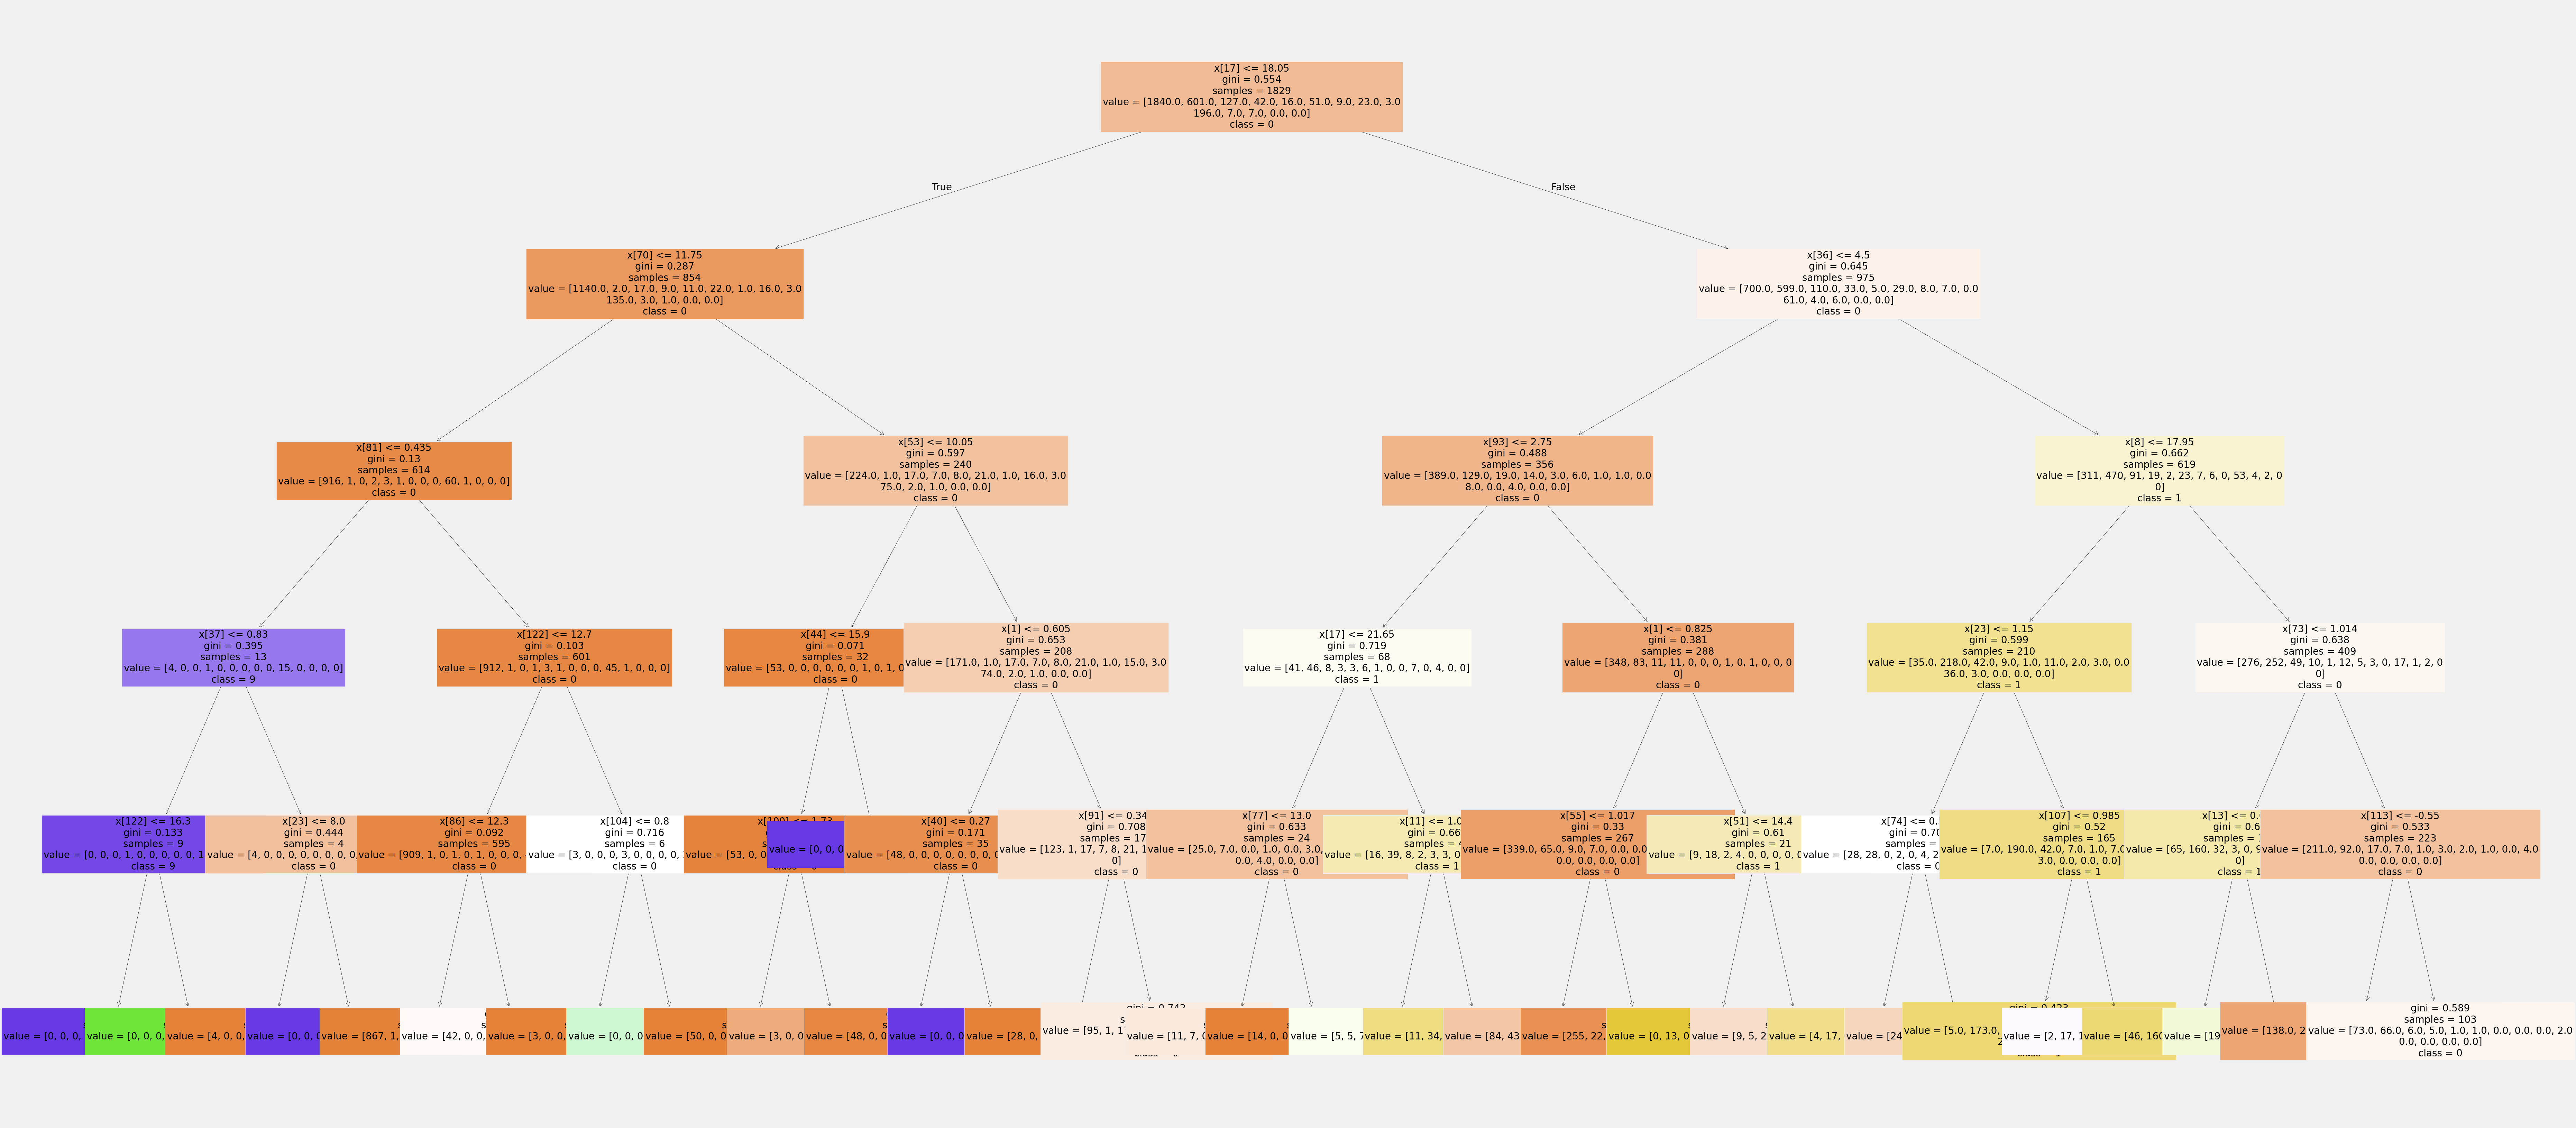

In [174]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[25], fontsize = 20, class_names=class_names, filled=True);

# Feature importance by station

In [175]:
newarray = clf.feature_importances_
newarray

array([2.10642843e-02, 1.34725384e-02, 2.28811157e-03, 2.11813878e-02,
       1.18803020e-01, 3.67704921e-02, 1.18855644e-02, 7.40064423e-03,
       1.45157481e-02, 1.07859376e-02, 7.76032179e-03, 2.26487999e-03,
       1.46804247e-02, 4.42436753e-02, 1.46615370e-02, 3.83147341e-02,
       8.10884292e-03, 4.55880678e-02, 1.58611292e-03, 1.46265004e-03,
       2.60698825e-03, 4.85328013e-03, 1.10250679e-03, 3.99525384e-03,
       3.45090084e-02, 1.63779245e-02, 3.61372649e-02, 2.24250623e-04,
       4.62004937e-04, 6.15935618e-03, 5.34528751e-03, 1.67530076e-03,
       7.20093310e-04, 2.45654245e-03, 3.12947346e-04, 3.19214059e-03,
       3.40728804e-03, 8.80219213e-04, 6.15081409e-03, 2.58096118e-03,
       2.57454606e-03, 2.90237567e-03, 5.93010217e-03, 5.42905876e-04,
       8.34803422e-03, 2.13703812e-04, 4.36265151e-04, 2.21377454e-03,
       2.09179436e-03, 7.51337997e-05, 3.42250604e-04, 4.30520845e-03,
       1.16434846e-03, 3.79438305e-03, 4.65556125e-04, 8.39078898e-03,
      

In [176]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[2.10642843e-02, 1.34725384e-02, 2.28811157e-03, 2.11813878e-02,
         1.18803020e-01, 3.67704921e-02, 1.18855644e-02, 7.40064423e-03,
         1.45157481e-02],
        [1.07859376e-02, 7.76032179e-03, 2.26487999e-03, 1.46804247e-02,
         4.42436753e-02, 1.46615370e-02, 3.83147341e-02, 8.10884292e-03,
         4.55880678e-02],
        [1.58611292e-03, 1.46265004e-03, 2.60698825e-03, 4.85328013e-03,
         1.10250679e-03, 3.99525384e-03, 3.45090084e-02, 1.63779245e-02,
         3.61372649e-02],
        [2.24250623e-04, 4.62004937e-04, 6.15935618e-03, 5.34528751e-03,
         1.67530076e-03, 7.20093310e-04, 2.45654245e-03, 3.12947346e-04,
         3.19214059e-03],
        [3.40728804e-03, 8.80219213e-04, 6.15081409e-03, 2.58096118e-03,
         2.57454606e-03, 2.90237567e-03, 5.93010217e-03, 5.42905876e-04,
         8.34803422e-03],
        [2.13703812e-04, 4.36265151e-04, 2.21377454e-03, 2.09179436e-03,
         7.51337997e-05, 3.42250604e-04, 4.30520845e-03, 1.16434846

In [177]:
sumarray = np.sum(newarray[0], axis=1)
print(sumarray.shape)
sumarray

(15,)


array([0.24738179, 0.18640842, 0.10263099, 0.02054792, 0.03331725,
       0.01463686, 0.03886743, 0.05990748, 0.03345511, 0.11657202,
       0.05850227, 0.01507914, 0.03040615, 0.01770577, 0.0245814 ])

In [178]:
# Creating station name index
stations = (Weather_sub2.columns.str.split('_', n=1).str[0].unique().tolist())
print(len(stations))
print(stations)

15
['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [179]:
important = pd.Series(sumarray, index=stations).sort_values(ascending=False)
important

BASEL         0.247382
BELGRADE      0.186408
MADRID        0.116572
BUDAPEST      0.102631
LJUBLJANA     0.059907
MUNCHENB      0.058502
KASSEL        0.038867
MAASTRICHT    0.033455
DUSSELDORF    0.033317
SONNBLICK     0.030406
VALENTIA      0.024581
DEBILT        0.020548
STOCKHOLM     0.017706
OSLO          0.015079
HEATHROW      0.014637
dtype: float64

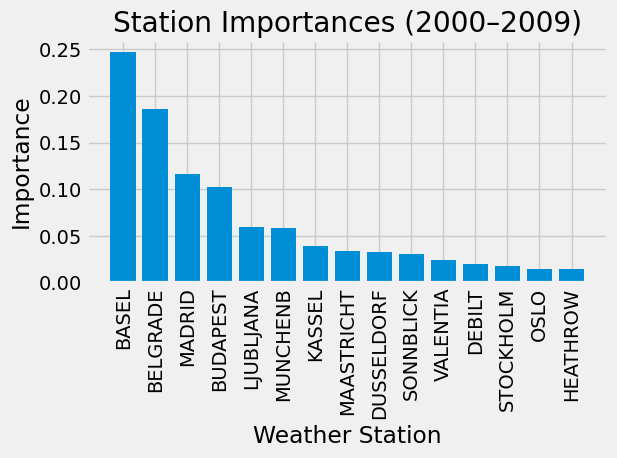

In [180]:
# Plotting weather stations importance
plt.style.use('fivethirtyeight')
x_values = range(len(important))
plt.bar(x_values, important.values)
plt.xticks(x_values, important.index, rotation=90)
plt.ylabel('Importance')
plt.xlabel('Weather Station')
plt.title('Station Importances (2000–2009)')
plt.tight_layout()
plt.show()

# -> Basel, Belgrade and Madrid weather stations still seem to have the most influence on how random forest divides up data